<a href="https://colab.research.google.com/github/Sakshidhore/FMML_Project_and_Labs/blob/main/Module2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

In [2]:
from google.colab import files
uploaded1 = files.upload()

Saving heart.csv to heart.csv


In [3]:
data = pd.read_csv("heart.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
data.shape

(303, 14)

In [5]:
data.shape


(303, 14)

In [6]:
## we will be comparing rest of the parameters/columns present in the data with respect to precence or absece of heart disease
data['target'] = data.target.replace({1: "Disease", 0: "No_disease"})
data['sex'] = data.sex.replace({1: "Male", 0: "Female"})
data['cp'] = data.cp.replace({1: "typical_angina",
                          2: "atypical_angina",
                          3:"non-anginal pain",
                          4: "asymtomatic"})
data['exang'] = data.exang.replace({1: "Yes", 0: "No"})
data['slope'] = data.cp.replace({1: "upsloping",
                          2: "flat",
                          3:"downsloping"})
data['thal'] = data.thal.replace({1: "fixed_defect", 2: "reversable_defect", 3:"normal"})

In [7]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,Male,non-anginal pain,145,233,1,0,150,No,2.3,non-anginal pain,0,fixed_defect,Disease
1,37,Male,atypical_angina,130,250,0,1,187,No,3.5,atypical_angina,0,reversable_defect,Disease
2,41,Female,typical_angina,130,204,0,0,172,No,1.4,typical_angina,0,reversable_defect,Disease
3,56,Male,typical_angina,120,236,0,1,178,No,0.8,typical_angina,0,reversable_defect,Disease
4,57,Female,0,120,354,0,1,163,Yes,0.6,0,0,reversable_defect,Disease


Text(0.5, 1.0, 'Heart Disease Classes')

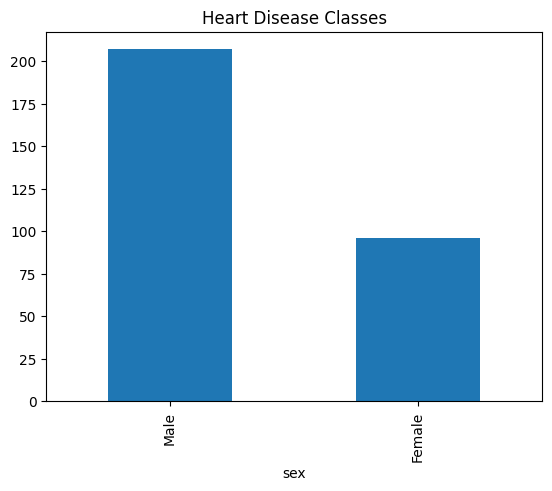

In [10]:
data['sex'].value_counts().plot(kind='bar').set_title('Heart Disease Classes')

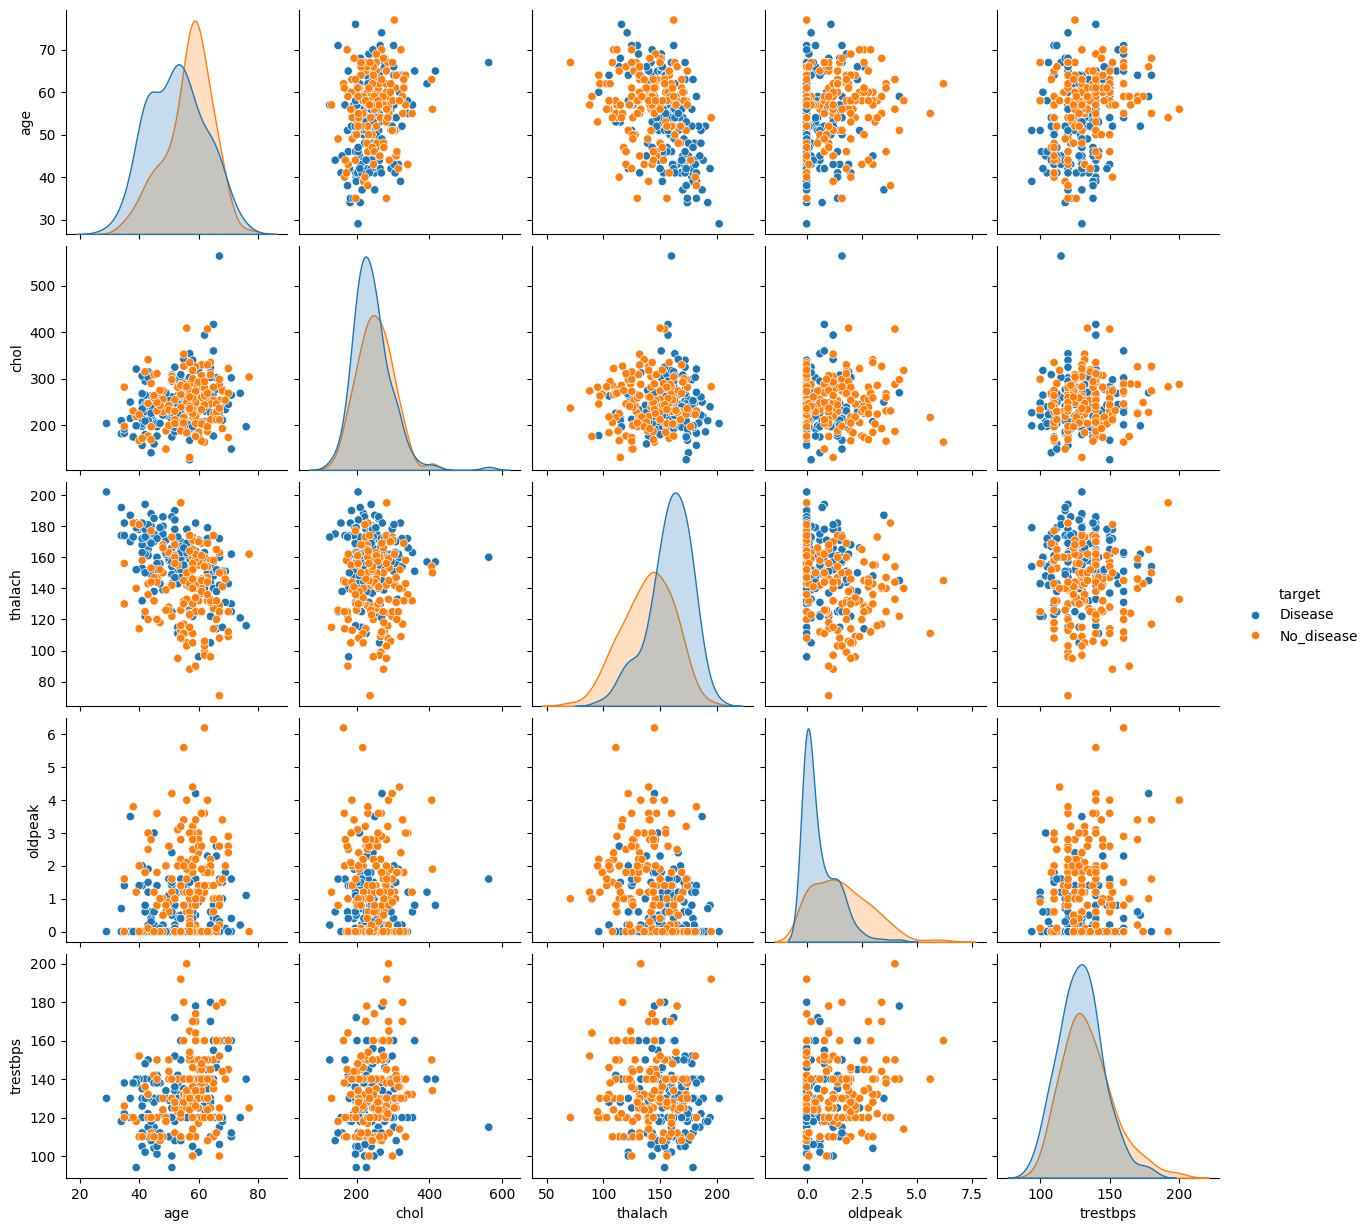

In [18]:
## pair plots can automoaticaly be used to viwe the pairwise relationship between all the  feature that we selected
continous_features = ['age', 'chol', 'thalach', 'oldpeak','trestbps']
sns.pairplot(data[continous_features + ['target']], hue='target')

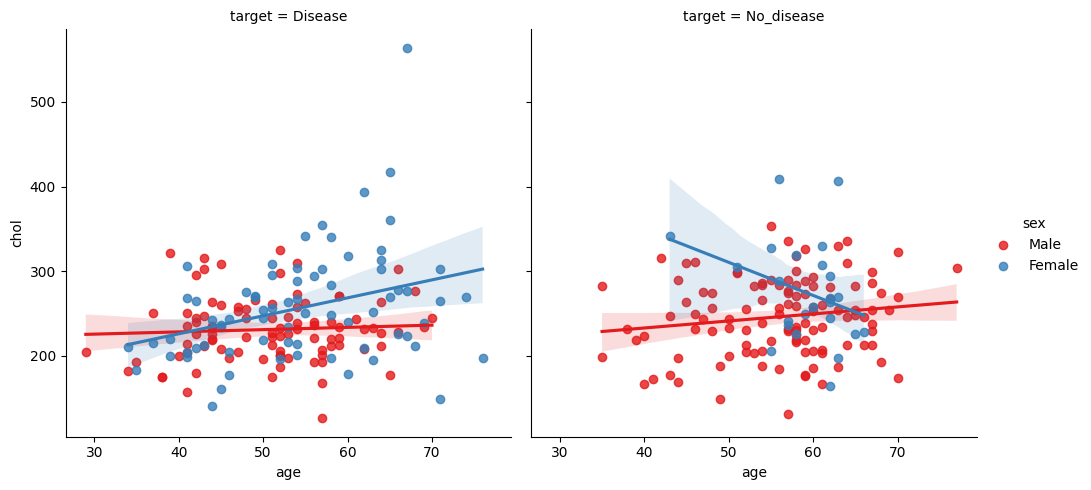

In [19]:
# Now lets try to understand the relationship between age and chol in each of the target based on sex.
sns.lmplot(x="age", y="chol", hue="sex", col="target",
           palette="Set1",
           data=data)
plt.show()

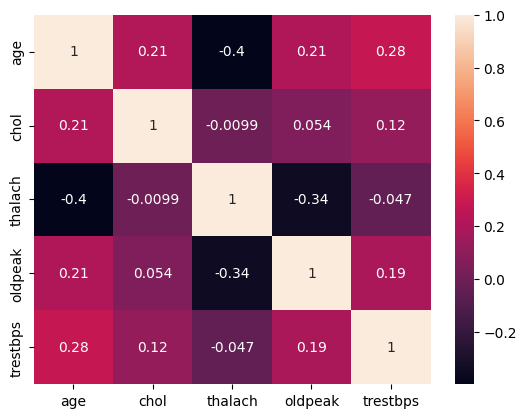

In [20]:
numeric_data = data[continous_features]

# Compute the correlation matrix
corr_matrix = numeric_data.corr()
sns.heatmap(corr_matrix, annot=True)


plt.show()

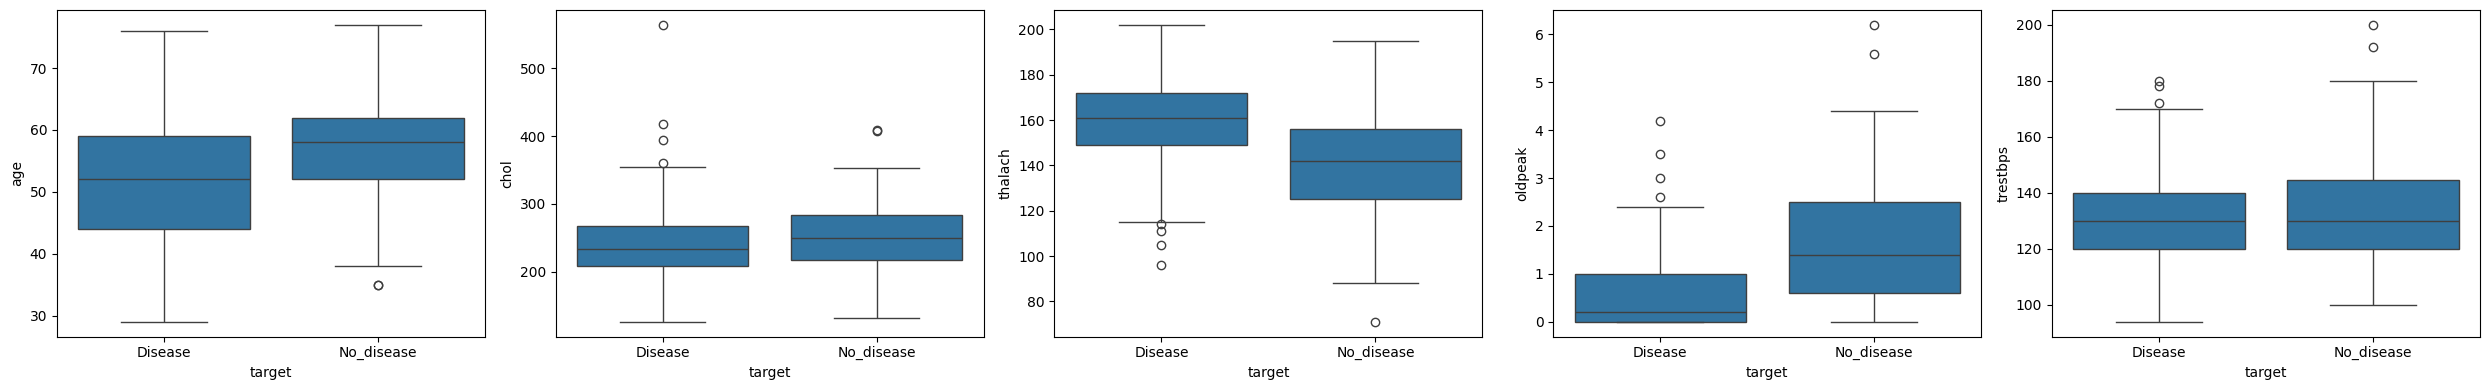

In [21]:
fig, axes = plt.subplots(1, len(continous_features), figsize=(25, 4), sharex=False, sharey=False)

for idx, feature in enumerate(continous_features):
    sns.boxplot(x='target', y=feature, data=data, ax=axes[idx])
plt.tight_layout()
plt.show()

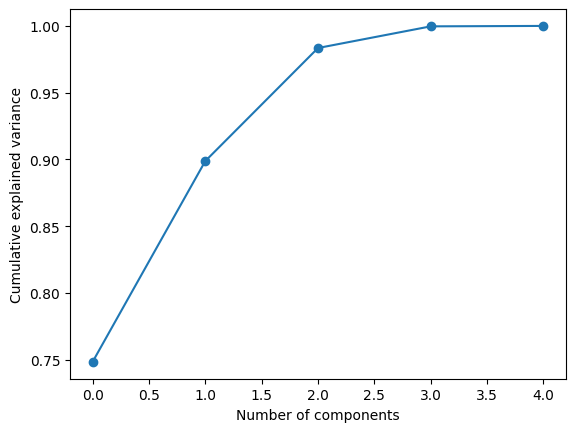

In [22]:
# prompt: plot the cumulative variace of pca for all the possibel pronviopal components
## to do
import matplotlib.pyplot as plt
import numpy as np
pca = PCA()
pca.fit(numeric_data)
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

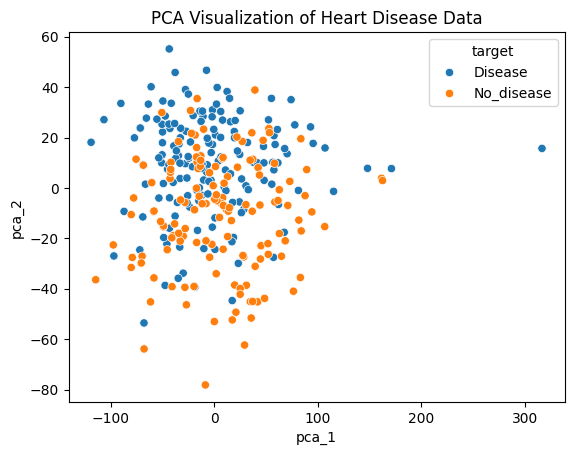

In [23]:
pca = PCA(n_components=2)
pca.fit(numeric_data)
pca_data = pca.transform(numeric_data)

# Create a DataFrame with the principal components and target labels
pca_df = pd.DataFrame({
    "pca_1": pca_data[:, 0],
    "pca_2": pca_data[:, 1],
    "target": data["target"]
})

# Visualize the PCA results with a scatter plot
sns.scatterplot(x="pca_1", y="pca_2", hue="target", data=pca_df)
plt.title("PCA Visualization of Heart Disease Data")
plt.show()

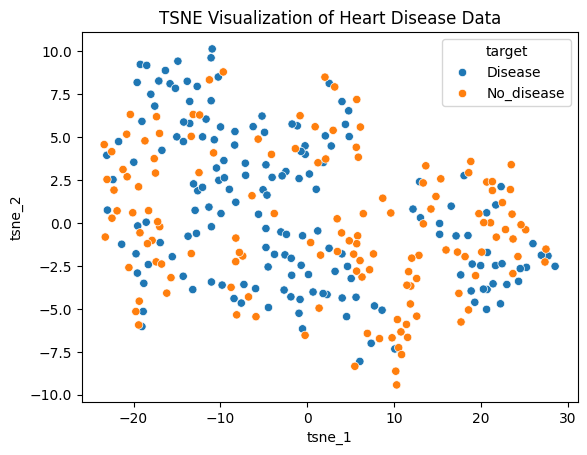

In [24]:
from sklearn.manifold import TSNE

# Initialize and fit the TSNE model
tsne = TSNE(n_components=2)
tsne_data = tsne.fit_transform(numeric_data)

# Create a DataFrame with the TSNE components and target labels
tsne_df = pd.DataFrame({
    "tsne_1": tsne_data[:, 0],
    "tsne_2": tsne_data[:, 1],
    "target": data["target"]
})

# Visualize the TSNE results with a scatter plot
sns.scatterplot(x="tsne_1", y="tsne_2", hue="target", data=tsne_df)
plt.title("TSNE Visualization of Heart Disease Data")
plt.show()

In [25]:
upload2 = files.upload()

Saving star_nutri_expanded.csv to star_nutri_expanded (1).csv


In [26]:
data = pd.read_csv("star_nutri_expanded.csv")

In [27]:
data.head()

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0%,0%,0%,0%,175
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0%,0%,0%,0%,260
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,0%,0%,330
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,2%,0%,410
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10%,0%,20%,0%,75


In [28]:
data['Caffeine (mg)'] = data['Caffeine (mg)'].replace('Varies', np.NaN).replace('varies', np.NaN)
data['Caffeine (mg)'] = data['Caffeine (mg)'].astype(np.float64)
data['Caffeine (mg)'] = data['Caffeine (mg)'].fillna(data['Caffeine (mg)'].mean())



In [29]:
data['Total Fat (g)'].unique()

array(['0.1', '3.5', '2.5', '0.2', '6', '4.5', '0.3', '7', '5', '0.4',
       '9', '1.5', '4', '2', '8', '3', '11', '0', '1', '10', '15', '13',
       '0.5', '3 2'], dtype=object)

In [30]:
data['Total Fat (g)'] = data['Total Fat (g)'].replace('3 2', '3.2')

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Beverage_category        242 non-null    object 
 1   Beverage                 242 non-null    object 
 2   Beverage_prep            242 non-null    object 
 3   Calories                 242 non-null    int64  
 4   Total Fat (g)            242 non-null    object 
 5   Trans Fat (g)            242 non-null    float64
 6   Saturated Fat (g)        242 non-null    float64
 7   Sodium (mg)              242 non-null    int64  
 8   Total Carbohydrates (g)  242 non-null    int64  
 9   Cholesterol (mg)         242 non-null    int64  
 10  Dietary Fibre (g)        242 non-null    int64  
 11  Sugars (g)               242 non-null    int64  
 12  Protein (g)              242 non-null    float64
 13  Vitamin A (% DV)         242 non-null    object 
 14  Vitamin C (% DV)         2

In [32]:
# Extract columns with int and float types
numeric_columns = data.select_dtypes(include=["int64", "float64"]).columns

# Print the numeric columns
print(numeric_columns)

Index(['Calories', 'Trans Fat (g)', 'Saturated Fat (g)', 'Sodium (mg)',
       'Total Carbohydrates (g)', 'Cholesterol (mg)', 'Dietary Fibre (g)',
       'Sugars (g)', 'Protein (g)', 'Caffeine (mg)'],
      dtype='object')


In [33]:
data['Beverage_category'].unique()

array(['Coffee', 'Classic Espresso Drinks', 'Signature Espresso Drinks',
       'Tazo® Tea Drinks', 'Shaken Iced Beverages', 'Smoothies',
       'Frappuccino® Blended Coffee', 'Frappuccino® Light Blended Coffee',
       'Frappuccino® Blended Crème'], dtype=object)

In [34]:
data['Tea'] = data['Beverage_category'].apply(lambda x: 1 if x == 'Tazo® Tea Drinks' else 0)
data = data.drop('Beverage_category', axis=1)

In [35]:
##  one hot encoding of categorical features in data
def onehot_encode(df, columns, prefixes):
    df = df.copy()
    for column, prefix in zip(columns, prefixes):
        dummies = pd.get_dummies(df[column], prefix=prefix)
        df = pd.concat([df, dummies], axis=1)
        df = df.drop(column, axis=1)
    return df

In [36]:
data = onehot_encode(
    data,
    columns=['Beverage', 'Beverage_prep'],
    prefixes=['bev', 'bevp']
)

In [37]:
data = data.replace({True: 1, False: 0})

<ipython-input-37-7a01f9f40121>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data = data.replace({True: 1, False: 0})


In [38]:
data = data.applymap(lambda x: np.float64(str(x).replace('%', '')))

<ipython-input-38-4d863302f14a>:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data = data.applymap(lambda x: np.float64(str(x).replace('%', '')))


In [39]:
data.head()

,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),...,bevp_Grande Nonfat Milk,bevp_Short,bevp_Short Nonfat Milk,bevp_Solo,bevp_Soymilk,bevp_Tall,bevp_Tall Nonfat Milk,bevp_Venti,bevp_Venti Nonfat Milk,bevp_Whole Milk
0,3.0,0.1,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.3,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4.0,0.1,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.5,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,5.0,0.1,0.0,0.0,0.0,10.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5.0,0.1,0.0,0.0,0.0,10.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,70.0,0.1,0.1,0.0,5.0,75.0,10.0,0.0,9.0,6.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 62 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   Calories                                                 242 non-null    float64
 1   Total Fat (g)                                            242 non-null    float64
 2   Trans Fat (g)                                            242 non-null    float64
 3   Saturated Fat (g)                                        242 non-null    float64
 4   Sodium (mg)                                              242 non-null    float64
 5   Total Carbohydrates (g)                                  242 non-null    float64
 6   Cholesterol (mg)                                         242 non-null    float64
 7   Dietary Fibre (g)                                        242 non-null    float64
 8   Sugars (g)                    

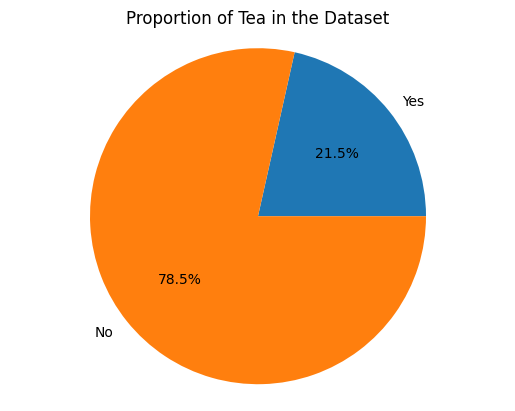

In [43]:
import matplotlib.pyplot as plt

# Data
labels = ['Yes', 'No']
sizes = [21.5, 78.5]

# Create pie chart
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Proportion of Tea in the Dataset')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

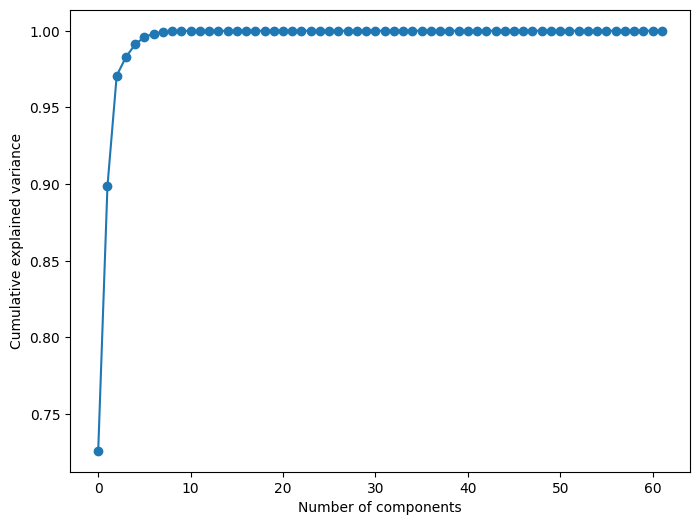

In [46]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

# Assuming you have your data in a numpy array called 'data'
pca = PCA()
pca.fit(data)
plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'o-')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

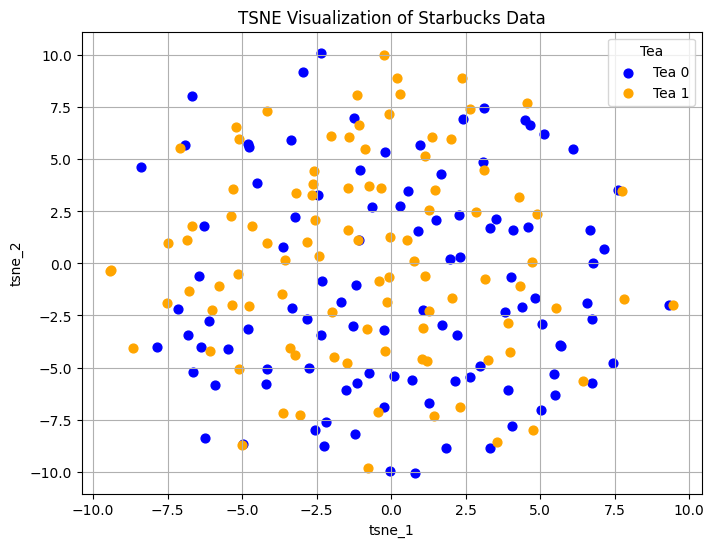

In [51]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import pandas as pd
import numpy as np

# Example dataset: Replace this with your actual Starbucks data
# numeric_data = <your numeric features>
# labels = <your 'Tea' column>

# Simulating data for the purpose of this example
np.random.seed(42)  # For reproducibility
numeric_data = np.random.randn(200, 10)  # 200 samples, 10 features
labels = np.random.choice([0, 1], size=200)  # Simulated 'Tea' labels (0 or 1)

# Perform t-SNE to reduce dimensions to 2D
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(numeric_data)

# Create a DataFrame for easy plotting
df = pd.DataFrame(tsne_results, columns=['tsne_1', 'tsne_2'])
df['Tea'] = labels

# Plot the t-SNE results with specific colors (orange and blue)
plt.figure(figsize=(8, 6))
plt.title('TSNE Visualization of Starbucks Data')

# Plot the data points
for label, color in zip([0, 1], ['blue', 'orange']):
    subset = df[df['Tea'] == label]
    plt.scatter(subset['tsne_1'], subset['tsne_2'],
                color=color, label=f'Tea {label}', s=40)

# Set axis labels
plt.xlabel('tsne_1')
plt.ylabel('tsne_2')

# Add legend
plt.legend(title='Tea')

# Display the plot
plt.grid(True)
plt.show()

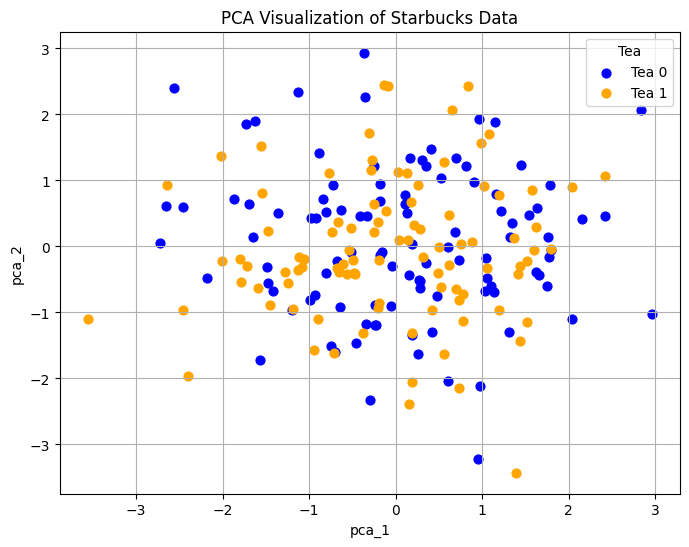

In [52]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np

# Example dataset: Replace this with your actual Starbucks data
# numeric_data = <your numeric features>
# labels = <your 'Tea' column>

# Simulating data for the purpose of this example
np.random.seed(42)  # For reproducibility
numeric_data = np.random.randn(200, 10)  # 200 samples, 10 features
labels = np.random.choice([0, 1], size=200)  # Simulated 'Tea' labels (0 or 1)

# Perform PCA to reduce dimensions to 2D
pca = PCA(n_components=2)
pca_results = pca.fit_transform(numeric_data)

# Create a DataFrame for easy plotting
df = pd.DataFrame(pca_results, columns=['pca_1', 'pca_2'])
df['Tea'] = labels

# Plot the PCA results with specific colors (orange and blue)
plt.figure(figsize=(8, 6))
plt.title('PCA Visualization of Starbucks Data')

# Plot the data points
for label, color in zip([0, 1], ['blue', 'orange']):
    subset = df[df['Tea'] == label]
    plt.scatter(subset['pca_1'], subset['pca_2'],
                color=color, label=f'Tea {label}', s=40)

# Set axis labels
plt.xlabel('pca_1')
plt.ylabel('pca_2')

# Add legend
plt.legend(title='Tea')

# Display the plot
plt.grid(True)
plt.show()

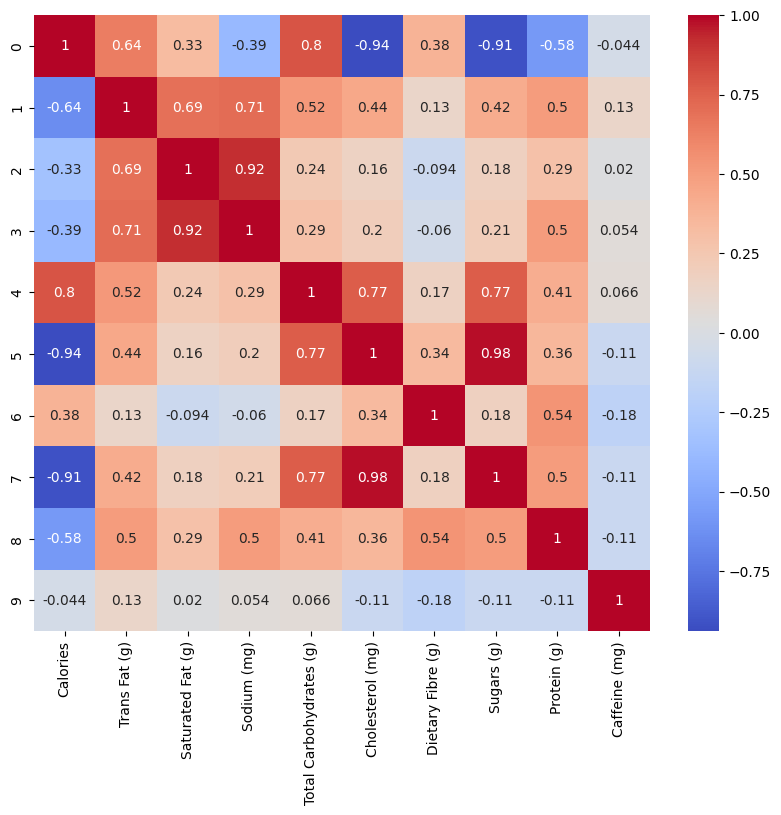

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Sample data - Replace this with your actual data
data = {'Calories': [1, -0.64, -0.33, -0.39, 0.8, -0.94, 0.38, -0.91, -0.58, -0.044],
        'Trans Fat (g)': [0.64, 1, 0.69, 0.71, 0.52, 0.44, 0.13, 0.42, 0.5, 0.13],
        'Saturated Fat (g)': [0.33, 0.69, 1, 0.92, 0.24, 0.16, -0.094, 0.18, 0.29, 0.02],
        'Sodium (mg)': [-0.39, 0.71, 0.92, 1, 0.29, 0.2, -0.06, 0.21, 0.5, 0.054],
        'Total Carbohydrates (g)': [0.8, 0.52, 0.24, 0.29, 1, 0.77, 0.17, 0.77, 0.41, 0.066],
        'Cholesterol (mg)': [-0.94, 0.44, 0.16, 0.2, 0.77, 1, 0.34, 0.98, 0.36, -0.11],
        'Dietary Fibre (g)': [0.38, 0.13, -0.094, -0.06, 0.17, 0.34, 1, 0.18, 0.54, -0.18],
        'Sugars (g)': [-0.91, 0.42, 0.18, 0.21, 0.77, 0.98, 0.18, 1, 0.5, -0.11],
        'Protein (g)': [-0.58, 0.5, 0.29, 0.5, 0.41, 0.36, 0.54, 0.5, 1, -0.11],
        'Caffeine (mg)': [-0.044, 0.13, 0.02, 0.054, 0.066, -0.11, -0.18, -0.11, -0.11, 1]}

# Convert the data to a pandas DataFrame
df = pd.DataFrame(data)

# Plot the heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df, annot=True, cmap='coolwarm', square=True)
plt.show()

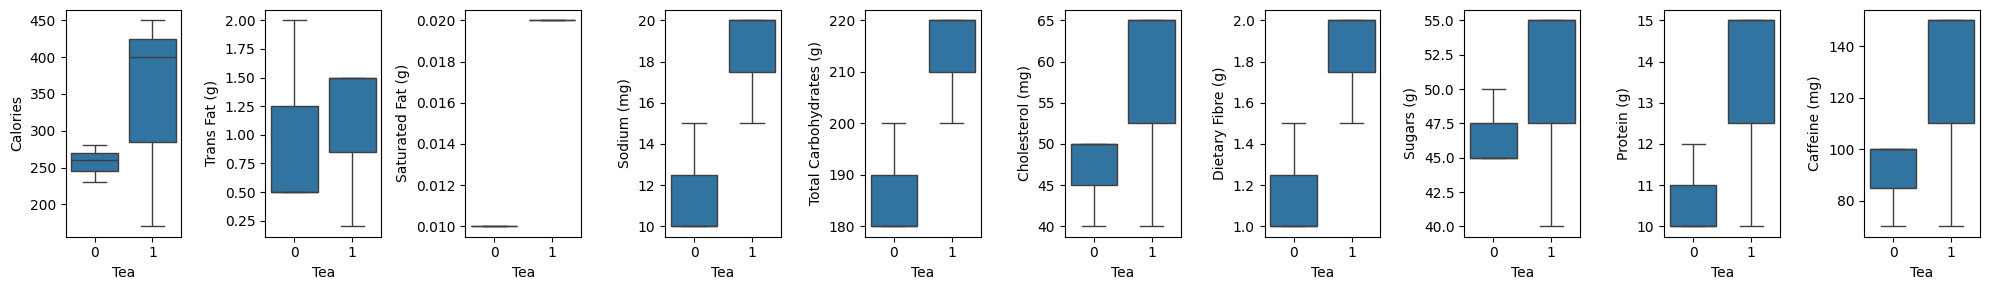

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Sample Dataframe for the boxplots
data = {'Calories': [260, 230, 450, 400, 280, 170],
        'Trans Fat (g)': [0.5, 0.5, 1.5, 1.5, 2.0, 0.2],
        'Saturated Fat (g)': [0.01, 0.01, 0.02, 0.02, 0.01, 0.02],
        'Sodium (mg)': [10, 10, 20, 20, 15, 15],
        'Total Carbohydrates (g)': [180, 180, 220, 220, 200, 200],
        'Cholesterol (mg)': [50, 50, 65, 65, 40, 40],
        'Dietary Fibre (g)': [1.0, 1.0, 2.0, 2.0, 1.5, 1.5],
        'Sugars (g)': [45, 45, 55, 55, 50, 40],
        'Protein (g)': [10, 10, 15, 15, 12, 10],
        'Caffeine (mg)': [100, 100, 150, 150, 70, 70],
        'Tea': [0, 0, 1, 1, 0, 1]}
df = pd.DataFrame(data)

# Create a figure and axes
fig, axes = plt.subplots(1, 10, figsize=(20, 3))

# Iterate through the columns and create boxplots
for i, col in enumerate(df.columns[:-1]):
    sns.boxplot(x='Tea', y=col, data=df, ax=axes[i])

# Adjust layout
plt.tight_layout()

# Display the